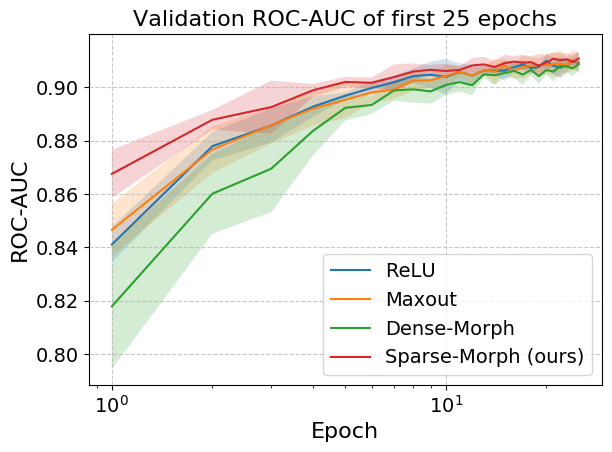

In [ ]:
import re
import numpy as np
import matplotlib.pyplot as plt

METHODS = ["relu", "maxout", "lmpl", "lmpl2bn"]  # Replace with your actual methods
method_labels = {"relu": "ReLU", "maxout": "Maxout", "lmpl": "Dense-Morph", "lmpl2bn": "Sparse-Morph (ours)"}
EPOCHS_TO_PLOT = 25
MODEL_PATH_TEMPLATE = "../models/final/best_model_scores_{}_{}.txt"

plt.rcParams.update({
    "font.size": 16,        # General font size
    "axes.titlesize": 16,   # Title size
    "axes.labelsize": 16,   # X and Y label size
    "xtick.labelsize": 14,  # X tick label size
    "ytick.labelsize": 14,  # Y tick label size
    "legend.fontsize": 14   # Legend font size
})

def parse_loss_values(method, i):
    scores = []
    file_path = MODEL_PATH_TEMPLATE.format(method, i)
    try:
        with open(file_path, "r") as f:
            for line in f:
                match = re.match(r"Epoch (\d+), loss ([0-9\.]+), AUC/ROC ([0-9\.]+), AUC/PR ([0-9\.]+)", line)
                if match:
                    ## CHANGE THIS TO OUTPUT ROC or PR PLOT
                    epoch, score = int(match.group(1)), float(match.group(3))
                    # epoch, score = int(match.group(1)), float(match.group(4))
                    if epoch < EPOCHS_TO_PLOT:
                        scores.append(score)
        if len(scores) < EPOCHS_TO_PLOT:
            scores.extend([np.nan] * (EPOCHS_TO_PLOT - len(scores)))
    except FileNotFoundError:
        print(f"Warning: {file_path} not found.")
        return [np.nan] * EPOCHS_TO_PLOT
    return scores

def plot_confidence_interval(x, mean_line, std_error, label, confidence_level=0.9):
    """
    Plot experimental results with confidence interval.
    
    Parameters:
    - experiments: Array of experimental results
    - confidence_level: Confidence interval to display (default 95%)
    """
    
    # Calculate z-score for desired confidence level
    from scipy import stats
    z_score = stats.norm.ppf((1 + confidence_level) / 2)
    lower_bound = mean_line - z_score * std_error
    upper_bound = mean_line + z_score * std_error
    
    # Plot mean line
    plt.plot(x, mean_line, label=label)
    
    # Fill confidence interval
    plt.fill_between(
        x, 
        lower_bound, 
        upper_bound, 
        # color='blue', 
        alpha=0.2,  # Opacity of the shaded area
        # label=f'{confidence_level*100}% Confidence Interval'
    )

def plot_validation_loss():
    # plt.figure(figsize=(6, 4.5))
    plt.figure()
    epochs = np.arange(1, EPOCHS_TO_PLOT + 1)
    
    for method in METHODS:
        all_scores = [parse_loss_values(method, i) for i in range(1, 6)]
        all_scores = np.array(all_scores)
        mean_scores = np.nanmean(all_scores, axis=0)
        std_scores = np.nanstd(all_scores, axis=0, ddof=1)
        
        # plt.errorbar(epochs, mean_losses, yerr=std_losses, label=method_labels[method], capsize=3)
        # plt.plot(epochs, mean_losses, label=method_labels[method])
        plot_confidence_interval(epochs, mean_scores, std_scores, method_labels[method])
    
    plt.xscale("log")
    plt.xlabel("Epoch")
    ## CHANGE THIS TO OUTPUT ROC or PR PLOTS
    plt.ylabel("ROC-AUC")
    # plt.ylabel('PR-AUC')
    ## CHANGE THIS TO OUTPUT ROC or PR PLOTS
    plt.title('Validation ROC-AUC of first 25 epochs')
    # plt.title('Validation PR-AUC of first 25 epochs')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    ## CHANGE THIS TO OUTPUT ROC or PR PLOTS
    plt.savefig("./plot_convegence_roc_bn.pdf")
    # plt.savefig("./plot_convegence_pr_bn.pdf")
    plt.show()

plot_validation_loss()
